**Workbook Starting Point to accompany post: "Earth Day 2017" => jupmpingjupyter.com**

# References

https://en.wikipedia.org/wiki/Neutrino_oscillation  
https://en.wikipedia.org/wiki/Solar_neutrino  
https://en.wikipedia.org/wiki/Deuterium  
https://en.wikipedia.org/wiki/Kamioka_Liquid_Scintillator_Antineutrino_Detector  
https://en.wikipedia.org/wiki/Scintillation_(physics)  
https://en.wikipedia.org/wiki/Daya_Bay_Reactor_Neutrino_Experiment  
https://en.wikipedia.org/wiki/Heavy_water  
https://phys.org/news/2017-02-deuterium-tritium-functionalized-metal-organic-framework.html  
https://www.iaea.org/newscenter/news/iaea-launches-database-fukushima-radiation-information  
https://newsgru.com/deuterium-deposits-make-philippines-the-riches-country-in-the-world/  
http://deuteriumproject.blogspot.com/  
https://en.wikipedia.org/wiki/Fuel_cell  
https://en.wikipedia.org/wiki/Francis_Thomas_Bacon  
https://data.giss.nasa.gov/o18data/  
https://en.wikipedia.org/wiki/Ocean_gyre  

# Commodities

In [28]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [80]:
LondonCopper = quandl.get('LME/PR_CU-Copper-Prices')
IndiaCopper = quandl.get('CHRIS/MCX_CU1')
CopperETF = quandl.get('GOOG/NYSE_JJC')
CopperStocks = quandl.get('GOOG/LON_FQM')

In [36]:
def plotQuandlData(df, outfile=False, title=None):
    df.plot()
    plt.title(title)
    ax = plt.subplot(111)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if outfile == False:
        plt.show()
    else:
        plt.savefig(outfile)

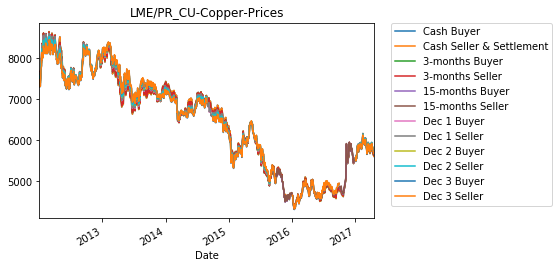

In [37]:
plotQuandlData(LondonCop, title='LME/PR_CU-Copper-Prices')

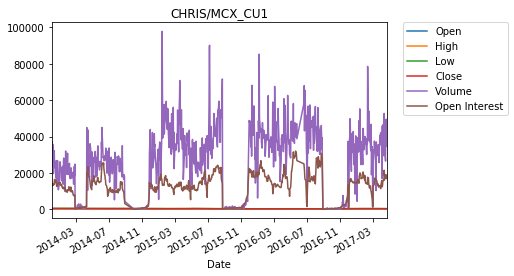

In [40]:
plotQuandlData(IndiaCopper, title='CHRIS/MCX_CU1')

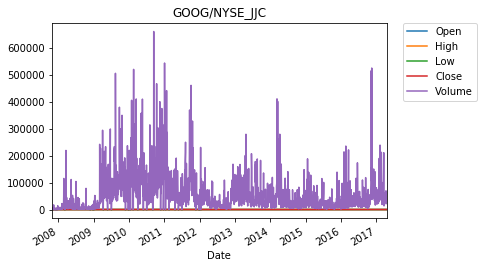

In [49]:
plotQuandlData(CopperETF, title='GOOG/NYSE_JJC', outfile='./copperTrend.png')

In [73]:
Copper2011 = CopperETF.loc['20110101':'20111231']

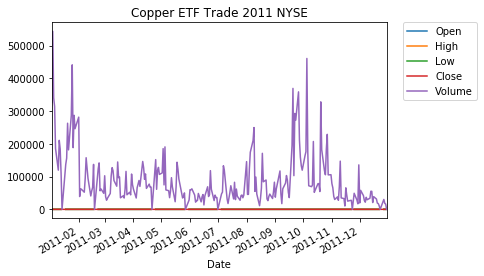

In [75]:
plotQuandlData(Copper2011, title='Copper ETF Trade 2011 NYSE', outfile='./CopperTrend2011.png')

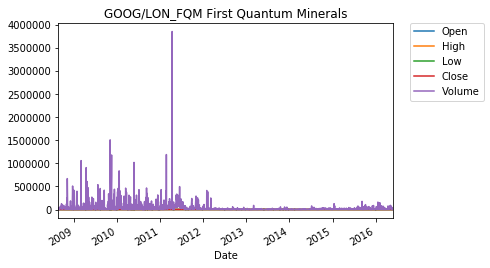

In [81]:
plotQuandlData(CopperStocks, title='GOOG/LON_FQM First Quantum Minerals' , outfile='FirstQuantumMinerals.png')

In [83]:
CopperStocks2011 = CopperStocks.loc['20110101':'20111231']

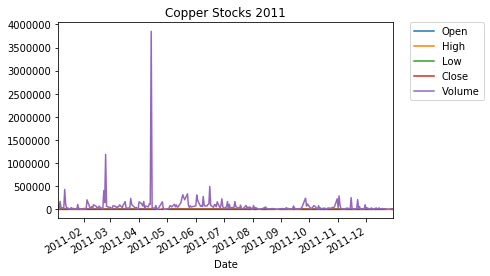

In [86]:
plotQuandlData(CopperStocks2011, title='Copper Stocks 2011', outfile='CopperStocks2011.png')

# Lets check for a Correlation in Zinc Prices

In [92]:
LondonZinc = quandl.get('LME/PR_ZI')
#NorthAmericaZinc = quandl.get('COM/ZINC')
ShanghaiFuturesZinc = quandl.get('CHRIS/SHFE_ZN1')
IndiaZinc = quandl.get('CHRIS/MCX_ZN1')

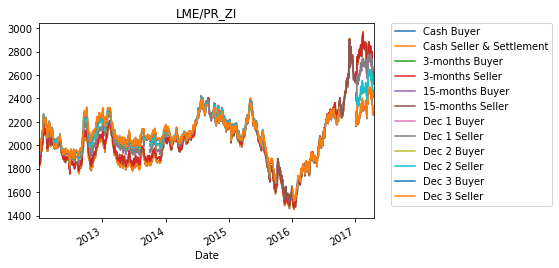

In [93]:
plotQuandlData(LondonZinc, title='LME/PR_ZI')

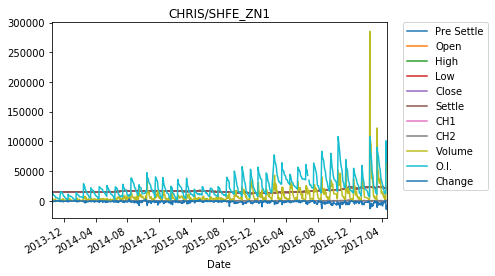

In [94]:
plotQuandlData(ShanghaiFuturesZinc, title='CHRIS/SHFE_ZN1')

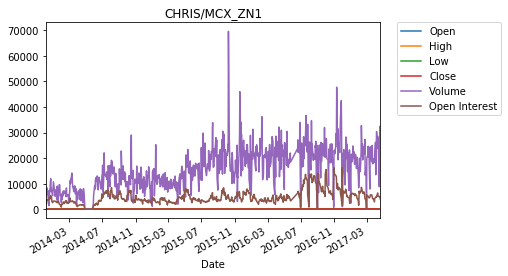

In [96]:
plotQuandlData(IndiaZinc, title='CHRIS/MCX_ZN1')

In [97]:
import requests

In [99]:
test = requests.get('https://www.quandl.com/api/v3/datasets/LME/PR_ZI.json?trim_start=2011-01-01&trim_end=2011-12-31')

In [101]:
test.content

b'{"dataset":{"id":19701922,"dataset_code":"PR_ZI","database_code":"LME","name":"Zinc Prices","description":"LME Official Prices in US$ per tonne.","refreshed_at":"2017-04-21T07:04:48.837Z","newest_available_date":"2017-04-20","oldest_available_date":"2012-01-03","column_names":["Date","Cash Buyer","Cash Seller \\u0026 Settlement","3-months Buyer","3-months Seller","15-months Buyer","15-months Seller","Dec 1 Buyer","Dec 1 Seller","Dec 2 Buyer","Dec 2 Seller","Dec 3 Buyer","Dec 3 Seller"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2012-01-03","end_date":"2011-12-31","data":[],"collapse":null,"order":null,"database_id":13206}}'

In [102]:
test = requests.get('https://www.quandl.com/api/v3/datasets/CHRIS/SHFE_ZN1.json?trim_start=2011-01-01&trim_end=2011-12-31')

In [103]:
test.content

b'{"dataset":{"id":9774518,"dataset_code":"SHFE_ZN1","database_code":"CHRIS","name":"Shanghai Zinc Futures, Continuous Contract #1 (ZN1) (Front Month)","description":"Historical Futures Prices: Shanghai Zinc Futures, Continuous Contract #1. Non-adjusted price based on spot-month continuous contract calculations. Raw data from SHFE.","refreshed_at":"2017-04-22T18:26:29.709Z","newest_available_date":"2017-04-21","oldest_available_date":"2013-10-16","column_names":["Date","Pre Settle","Open","High","Low","Close","Settle","CH1","CH2","Volume","O.I.","Change"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2013-10-16","end_date":"2011-12-31","data":[],"collapse":null,"order":null,"database_id":596}}'

# Worldwide Oceanic Deuterium Levels

Data Provided by the NASA  
https://data.giss.nasa.gov/o18data/#NB  

In [123]:
columns = 'Longitude	Latitude	Depth	pTemperature	Salinity	d18O	dD	Year	Month	Reference'.split('\t')

In [124]:
columns

['Longitude',
 'Latitude',
 'Depth',
 'pTemperature',
 'Salinity',
 'd18O',
 'dD',
 'Year',
 'Month',
 'Reference']

dD is the recorded deuterium level

In [175]:
with open('./db018.txt', 'r') as f:
    data = f.readlines()

In [176]:
import pymongo

In [177]:
client = pymongo.MongoClient()

In [178]:
db = client['NASA']

In [179]:
db.drop_collection('O18dD')

{'nIndexesWas': 1, 'ns': 'NASA.O18dD', 'ok': 1.0}

In [180]:
collection = db['O18dD']

In [181]:
i=0
for line in data[:-1]:
    line = line.split('\t')
    if i%1000 == 0 :
        print(i)
    try:
        entry = {
            columns[0]:line[0],
            columns[1]:line[1],
            columns[2]:line[2],
            columns[3]:line[3],
            columns[4]:line[4],
            columns[5]:line[5],
            columns[6]:line[6],
            columns[7]:line[7],
            columns[8]:line[8],
            columns[9]:line[9],
        }
        collection.insert_one(entry)
    except:
        print(i)
    i+=1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [182]:
!wc -l ./db018.txt

25514 ./db018.txt


In [282]:
dataset = collection.find({'dD':{'$ne':'**'}})

In [283]:
dataset.count()

1013

In [284]:
dD = pd.DataFrame()

In [285]:
for entry in dataset:
    try:
        data = dataset.next()
        df = pd.DataFrame.from_dict(data, orient='index').T
        dD = dD.append(df, ignore_index=True)
    except:
        pass

In [287]:
dD.dD = dD.dD.astype('float')

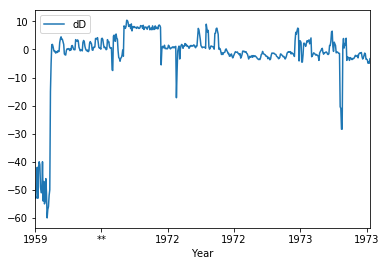

In [290]:
dD.plot(x='Year')

In [289]:
dD

,Reference,Latitude,d18O,_id,Longitude,pTemperature,Month,Salinity,Depth,Year,dD
0,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e2189,15.20,**,7,**,15,1959,-52.0
1,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e218b,15.20,**,7,**,40,1959,-53.0
2,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e218d,15.20,**,7,**,60,1959,-48.0
3,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e218f,15.20,**,7,**,85,1959,-42.0
4,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e2191,15.20,**,8,**,28,1960,-53.0
5,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e2193,15.20,**,8,**,48,1960,-42.0
6,Ehhalt (1969)\n,55.32,**,58fbea7904cb0b12169e2195,15.20,**,8,**,88,1960,-40.0
7,Frohlich et al (1988)\n,54.71,-5.30,58fbea7904cb0b12169e2197,13.95,**,7,12.69,30,1983,-41.0
8,Frohlich et al (1988)\n,54.63,-6.60,58fbea7904cb0b12169e2199,14.28,**,7,8.51,26,1983,-49.0
9,Frohlich et al (1988)\n,54.24,-6.50,58fbea7904cb0b12169e219b,14.07,**,7,7.97,12,1983,-51.0


It is pretty clear this data will not have what we need in order to draw conclusions

Further investigation required.